In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
# IQR 이상치 제거를 위한 함수

def get_outlier_mask(df, weight=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR = Q3 - Q1
    IQR_weight = IQR * weight
    
    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight
    
    ourlier_per_column = (df < range_min | df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)
    
    return is_outlier

In [7]:
# 판다스 출력 결과를 소수점 2자리 까지로 제한

pd.options.display.float_format = '{:, .2f}'.format

In [8]:
# 데이터 불러오기

sales_df = pd.read_csv('sales_data.csv', index_col=['customer_id'])

In [9]:
# 이상치 제거

outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)
sales_df = sales_df[~outlier_idx_cust_df]

TypeError: unsupported operand type(s) for |: 'float' and 'int'

In [10]:
# 표준화

df_mean = sales_df.mean()
df_std = sales_df.std()
scaled_df = (sales_df - df_mean/df_std)
scaled_df.columns = ['total_buy_cnt', 'total_price']

In [11]:
# 인덱스 설정

scaled_df.index = sales_df.index

In [12]:
# k-means(k=2)

model = KMeans(n_clusters=2, random_state=123)

In [29]:
# 모델 학습

model.fit(scaled_df)

/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=123)

In [30]:
# label 컬럼 생성

scaled_df['label'] = model.predict(scaled_df)

scaled_df

ValueError: Invalid format specifier ', .2f' for object of type 'float'

ValueError: Invalid format specifier ', .2f' for object of type 'float'

In [16]:
# 각 군집의 중심점

centers = model.cluster_centers_

In [25]:
# 스타일 지정

sns.set(style="darkgrid",
       rc={'figure.figsize':(16,9)})

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

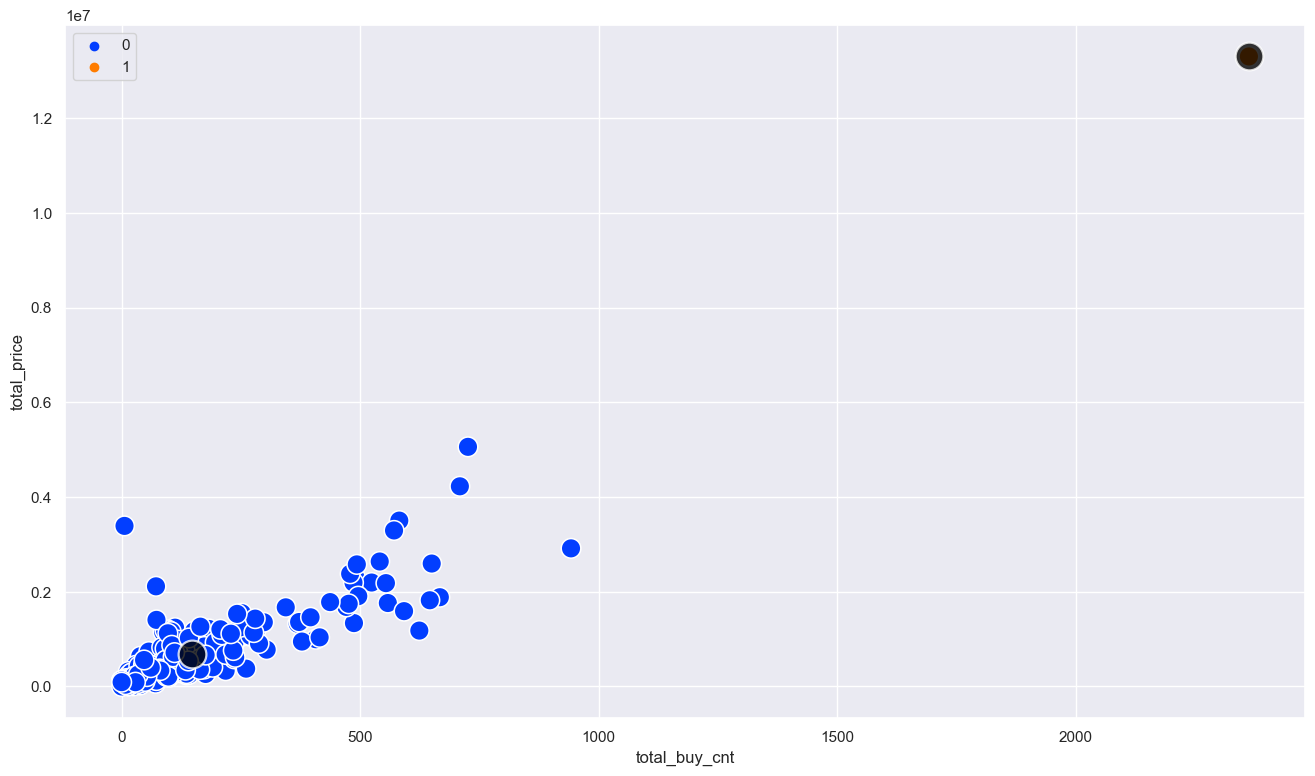

In [27]:
# 시각화

sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], data=scaled_df, hue=scaled_df['label'], s=200, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=400)